# Recolección de datos electorales en Ecuador año 2006

Empezamos recolectando la información de las elecciones correspondientes al año 2002 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2002, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [1]:
import pandas as pd
import numpy as np
import os
import glob 
import matplotlib as mp 
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2006\2da vuelta")
df_p2006=pd.read_csv('p2006.csv')
df_p2006.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,7,EL ORO,360,ZARUMA,5,ABANIN,RURAL
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON,RURAL
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS,RURAL
4,15,NAPO,620,TENA,25,AHUANO,RURAL


In [3]:
df_c2006=pd.read_csv('c2006.csv')
df_c2006.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1,SUPLENTE_GRUPO_DE_EDAD.1,SUPLENTE_NOMBRE.2,SUPLENTE_SEXO.2,SUPLENTE_EDAD_EXACTA.2,SUPLENTE_GRUPO_DE_EDAD.2
0,5,2001,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH,2,34.218579,2,NARANJO MONTERO SEGUNDO MILTON,1,60.608219,3,NaN,,,
1,5,2001,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA,2,42.813699,2,BRITO FIERRO ANGEL GABRIEL,1,55.109589,3,NaN,,,
2,5,6,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA,2,37.249315,2,BAQUE FLORES LUIS EFREN,1,43.736986,2,NaN,,,
3,3,9002,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA,2,27.701370,1,CHILA PLASENCIA AURELIO JUSTINO,1,50.322404,3,NaN,,,
4,5,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN,1,45.926230,3,GUILLEN VASQUEZ EDISON NICOLAS,1,41.372603,2,NaN,,,


In [4]:
df_2V2006=pd.read_csv('2V2006.csv')
df_2V2006

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,SEXO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,556,6875,2,10,31,171,5,1000000000004,584,
1,1,1,556,6875,1,12,25,170,5,1000000000004,672,
2,1,1,915,6435,2,12,61,330,5,1000000000004,419,
3,1,1,915,6435,1,11,22,192,5,1000000000004,377,
4,1,1,915,1535,2,1,5,29,5,1000000000004,18,
...,...,...,...,...,...,...,...,...,...,...,...,...
4957,1,19,655,1770,1,2,1,14,72,1000000000012,192,1
4958,1,19,655,4010,2,2,1,7,72,1000000000012,108,1
4959,1,19,655,4010,1,2,0,6,72,1000000000012,114,1
4960,1,19,655,6305,2,15,28,184,72,1000000000012,1706,1


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero.

In [5]:
df_c2006.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPOS_DE_EDAD        int64
SUPLENTE_NOMBRE.1              object
SUPLENTE_SEXO.1                 int64
SUPLENTE_EDAD_EXACTA.1        float64
SUPLENTE_GRUPO_DE_EDAD.1        int64
SUPLENTE_NOMBRE.2              object
SUPLENTE_SEXO.2                object
SUPLENTE_EDAD_EXACTA.2         object
SUPLENTE_GRUPO_DE_EDAD.2       object
dtype: object

In [6]:
df_c2006=df_c2006.drop(['SUPLENTE_GRUPO_DE_EDAD.1','SUPLENTE_NOMBRE.2','SUPLENTE_SEXO.2','SUPLENTE_EDAD_EXACTA.2','SUPLENTE_GRUPO_DE_EDAD.2'], axis=1)

In [7]:
df_c2006.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPOS_DE_EDAD        int64
SUPLENTE_NOMBRE.1              object
SUPLENTE_SEXO.1                 int64
SUPLENTE_EDAD_EXACTA.1        float64
dtype: object

In [8]:
df_c2006.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1
0,5,2001,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH,2,34.218579,2,NARANJO MONTERO SEGUNDO MILTON,1,60.608219
1,5,2001,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA,2,42.813699,2,BRITO FIERRO ANGEL GABRIEL,1,55.109589
2,5,6,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA,2,37.249315,2,BAQUE FLORES LUIS EFREN,1,43.736986
3,3,9002,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA,2,27.701370,1,CHILA PLASENCIA AURELIO JUSTINO,1,50.322404
4,5,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN,1,45.926230,3,GUILLEN VASQUEZ EDISON NICOLAS,1,41.372603


De la tabla de resultados, también eliminamos las columnas sin importancia.

In [9]:
df_2V2006=df_2V2006.drop(['DIGNIDAD_CODIGO','SEXO'], axis=1)
df_2V2006

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,556,6875,10,31,171,5,1000000000004,584,
1,1,556,6875,12,25,170,5,1000000000004,672,
2,1,915,6435,12,61,330,5,1000000000004,419,
3,1,915,6435,11,22,192,5,1000000000004,377,
4,1,915,1535,1,5,29,5,1000000000004,18,
...,...,...,...,...,...,...,...,...,...,...
4957,19,655,1770,2,1,14,72,1000000000012,192,1
4958,19,655,4010,2,1,7,72,1000000000012,108,1
4959,19,655,4010,2,0,6,72,1000000000012,114,1
4960,19,655,6305,15,28,184,72,1000000000012,1706,1


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla.

In [10]:
df_2V2006.count()

PROVINCIA_CODIGO    4962
CANTON_CODIGO       4962
PARROQUIA_CODIGO    4962
NUMERO_DE_ACTAS     4962
VOTOS_EN_BLANCO     4962
VOTOS_NULOS         4962
OP_CODIGO           4962
CANDIDATO_CODIGO    4962
CANDIDATO_VOTOS     4962
CANDIDATO_ESTADO    4962
dtype: int64

Por lo visto no existen filas duplicadas, por lo que continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [11]:
print(df_2V2006.isnull().sum())

PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
NUMERO_DE_ACTAS     0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
CANDIDATO_ESTADO    0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información.

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [12]:
df_c2006.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2006.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1
0,5,2001,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH,2,34.218579,2,NARANJO MONTERO SEGUNDO MILTON,1,60.608219
1,5,2001,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA,2,42.813699,2,BRITO FIERRO ANGEL GABRIEL,1,55.109589
2,5,6,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA,2,37.249315,2,BAQUE FLORES LUIS EFREN,1,43.736986
3,3,9002,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA,2,27.701370,1,CHILA PLASENCIA AURELIO JUSTINO,1,50.322404
4,5,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN,1,45.926230,3,GUILLEN VASQUEZ EDISON NICOLAS,1,41.372603


Ordenamos nuestra tabla por codigo

In [13]:
df_c2006.sort_values(['CODIGO'], ascending=True, inplace=True)
df_c2006.head(15)

,DIGNIDAD_CODIGO,OP_CODIGO,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1
2580,1,48,1000000000001,1,0,0,0,GUTIERREZ BORBUA FAUSTO GILMAR,1,38.663934,2,ESCOBAR BRAVO LEONARDO GERMAN,1,58.248634
5042,1,1,1000000000002,1,0,0,0,DAMERVAL MARTINEZ JAIME FRANCISCO,1,65.904372,4,MORENO BADILLO LIDA JOSEFINA,2,55.408219
2332,1,4,1000000000003,1,0,0,0,VITERI JIMENEZ CYNTHIA FERNANDA,2,40.904110,2,DAVALOS SALAZAR ERNESTO PATRICIO,1,60.008219
7410,1,5,1000000000004,1,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
4681,1,6,1000000000005,1,0,0,0,ROSERO GONZALEZ JOSE FERNANDO,1,57.712329,3,MENDOZA SALAZAR SUSY DEL ROCIO,2,39.342466
3145,1,71,1000000000006,1,0,0,0,ROLDOS AGUILERA LEON EUSEBIO,1,64.235616,3,GONZALEZ JARAMILLO JOSE RAMIRO,1,48.136986
957,1,24,1000000000007,1,0,0,0,SAGNAY DE LA BASTIDA CARLOS FRANCISCO,1,50.639344,3,BENAVIDES REINOZO EULALIA JEANNETTE,2,45.745205
1124,1,8,1000000000008,1,0,0,0,VILLACIS MALDONADO LUIS ALFREDO,1,54.663934,3,BUELVA YASACA CESAR,1,45.753425
6863,1,10,1000000000009,1,0,0,0,MACAS AMBULUDI LUIS ALBERTO,1,56.367123,3,SACOTO GUZMAN CESAR AUGUSTO,1,69.583562
5693,1,16,1000000000010,1,0,0,0,TORRES PASTOR LENIN GALO ARTURO,1,71.419178,4,PAREJA CORTEZ MARIA MAGDALENA,2,43.232877


In [14]:
df_rp=pd.merge(left=df_2V2006, right=df_c2006, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,...,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1
0,1,556,6875,10,31,171,5,1000000000004,584,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
1,1,556,6875,12,25,170,5,1000000000004,672,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
2,1,915,6435,12,61,330,5,1000000000004,419,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
3,1,915,6435,11,22,192,5,1000000000004,377,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
4,1,915,1535,1,5,29,5,1000000000004,18,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,19,655,1770,2,1,14,72,1000000000012,192,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4958,19,655,4010,2,1,7,72,1000000000012,108,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4959,19,655,4010,2,0,6,72,1000000000012,114,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4960,19,655,6305,15,28,184,72,1000000000012,1706,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato.

In [15]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,70219,681960,3517635
NOBOA PONTON ALVARO FERNANDO,70219,681960,2689418


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

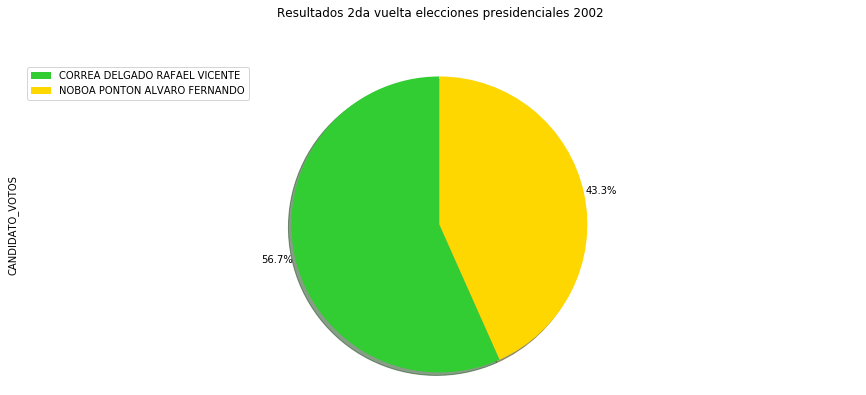

In [16]:
Colores= ['limegreen','gold']

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 2da vuelta elecciones presidenciales 2002', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='upper left') 

plt.show()

## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [17]:
df_p=pd.merge(left=df_2V2006, right=df_c2006, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p

,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,...,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1
0,1,556,6875,10,31,171,5,1000000000004,584,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
1,1,556,6875,12,25,170,5,1000000000004,672,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
2,1,915,6435,12,61,330,5,1000000000004,419,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
3,1,915,6435,11,22,192,5,1000000000004,377,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
4,1,915,1535,1,5,29,5,1000000000004,18,,...,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,55.898630,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,19,655,1770,2,1,14,72,1000000000012,192,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4958,19,655,4010,2,1,7,72,1000000000012,108,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4959,19,655,4010,2,0,6,72,1000000000012,114,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342
4960,19,655,6305,15,28,184,72,1000000000012,1706,1,...,0,0,0,CORREA DELGADO RAFAEL VICENTE,1,43.526027,2,MORENO GARCES LENIN BOLTAIRE,1,53.575342


In [18]:
df_p=pd.merge(left=df_p, right=df_p2006, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,PROVINCIA_CODIGO,CANTON_CODIGO_x,PARROQUIA_CODIGO_x,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO_x,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,...,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1,PROVINCIA_NOMBRE,CANTON_CODIGO_y,CANTON_NOMBRE,PARROQUIA_CODIGO_y,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,1,556,6875,10,31,171,5,1000000000004,584,,...,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
1,1,556,6875,10,31,171,5,1000000000004,584,,...,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322,AZUAY,955,SEVILLA DE ORO,85,AMALUZA,RURAL
2,1,556,6875,10,31,171,5,1000000000004,584,,...,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322,AZUAY,270,GIRON,175,ASUNCION,RURAL
3,1,556,6875,10,31,171,5,1000000000004,584,,...,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322,AZUAY,260,CUENCA,285,BANOS,RURAL
4,1,556,6875,10,31,171,5,1000000000004,584,,...,3,TAIANO ALVAREZ JOSE VICENTE,1,50.527322,AZUAY,275,PAUTE,395,BULAN/JVICTOR IZQUIERDO,RURAL


In [19]:
df_prov=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  VOTOS_NULOS  \
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                              
AZUAY            CORREA DELGADO RAFAEL VICENTE           333696      2928992   
                 NOBOA PONTON ALVARO FERNANDO            333696      2928992   
BOLIVAR          CORREA DELGADO RAFAEL VICENTE            57188       441467   
                 NOBOA PONTON ALVARO FERNANDO             57188       441467   
CANAR            CORREA DELGADO RAFAEL VICENTE            56736       424980   
                 NOBOA PONTON ALVARO FERNANDO             56736       424980   
CARCHI           CORREA DELGADO RAFAEL VICENTE            32970       320390   
                 NOBOA PONTON ALVARO FERNANDO             32970       320390   
CHIMBORAZO       CORREA DELGADO RAFAEL VICENTE           257420      1881789   
                 NOBOA PONTON ALVARO FERNANDO            257420      1881789   
COTOPAXI         CORREA DELGADO RAFAEL VICENTE           136988      1172816   
                 NOBOA PONTON ALVARO FERNANDO            136988      1172816   
EL ORO           CORREA DELGADO RAFAEL VICENTE           188568      1836189   
                 NOBOA PONTON ALVARO FERNANDO            188568      1836189   
ESMERALDAS       CORREA DELGADO RAFAEL VICENTE           164820      1392260   
                 NOBOA PONTON ALVARO FERNANDO            164820      1392260   
GALAPAGOS        CORREA DELGADO RAFAEL VICENTE              464         4816   
                 NOBOA PONTON ALVARO FERNANDO               464         4816   
GUAYAS           CORREA DELGADO RAFAEL VICENTE          1354847     14397174   
                 NOBOA PONTON ALVARO FERNANDO           1354847     14397174   
IMBABURA         CORREA DELGADO RAFAEL VICENTE           112798      1114554   
                 NOBOA PONTON ALVARO FERNANDO            112798      1114554   
LOJA             CORREA DELGADO RAFAEL VICENTE           246500      1696200   
                 NOBOA PONTON ALVARO FERNANDO            246500      1696200   
LOS RIOS         CORREA DELGADO RAFAEL VICENTE           219040      1772200   
                 NOBOA PONTON ALVARO FERNANDO            219040      1772200   
MANABI           CORREA DELGADO RAFAEL VICENTE           901719      6953765   
                 NOBOA PONTON ALVARO FERNANDO            901719      6953765   
MORONA SANTIAGO  CORREA DELGADO RAFAEL VICENTE            43964       249980   
                 NOBOA PONTON ALVARO FERNANDO             43964       249980   
NAPO             CORREA DELGADO RAFAEL VICENTE            10166        95979   
                 NOBOA PONTON ALVARO FERNANDO             10166        95979   
ORELLANA         CORREA DELGADO RAFAEL VICENTE            16830       147492   
                 NOBOA PONTON ALVARO FERNANDO             16830       147492   
PASTAZA          CORREA DELGADO RAFAEL VICENTE             7287        63945   
                 NOBOA PONTON ALVARO FERNANDO              7287        63945   
PICHINCHA        CORREA DELGADO RAFAEL VICENTE           715200     12034176   
                 NOBOA PONTON ALVARO FERNANDO            715200     12034176   
SUCUMBIOS        CORREA DELGADO RAFAEL VICENTE            26697       226215   
                 NOBOA PONTON ALVARO FERNANDO             26697       226215   
TUNGURAHUA       CORREA DELGADO RAFAEL VICENTE           165438      1863729   
                 NOBOA PONTON ALVARO FERNANDO            165438      1863729   
VOTO EXTERIOR    CORREA DELGADO RAFAEL VICENTE            73078       611647   
                 NOBOA PONTON ALVARO FERNANDO             73078       611647   
ZAMORA CHINCHIPE CORREA DELGADO RAFAEL VICENTE            13362        75378   
                 NOBOA PONTON ALVARO FERNANDO             13362        75378   

                                                CANDIDATO_VOTOS  
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                
AZUAY            CORREA DELGADO RAFAEL VICENTE         18912520  
         

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [20]:
df_prov1=df_prov['CANDIDATO_VOTOS']
df_prov1=df_prov1.unstack(level=[1])

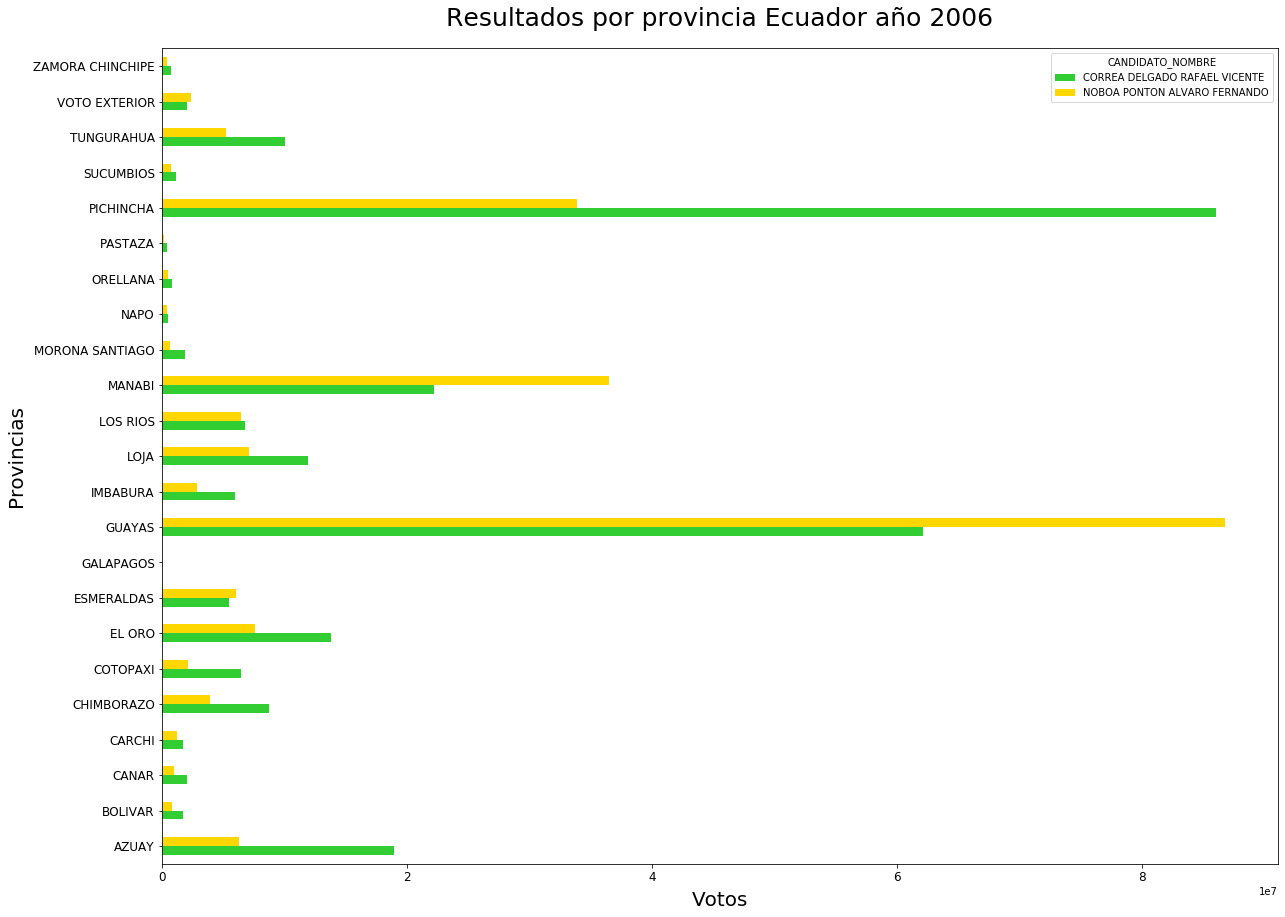

In [22]:
df_prov1.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2006', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [23]:
df_cant=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
CANTON_NOMBRE      CANDIDATO_NOMBRE                                 
24 DE MAYO         CORREA DELGADO RAFAEL VICENTE            39636   
                   NOBOA PONTON ALVARO FERNANDO             39636   
A.BAQUERIZO MORENO CORREA DELGADO RAFAEL VICENTE            15223   
                   NOBOA PONTON ALVARO FERNANDO             15223   
AGUARICO           CORREA DELGADO RAFAEL VICENTE             2970   
                   NOBOA PONTON ALVARO FERNANDO              2970   
ALAUSI             CORREA DELGADO RAFAEL VICENTE            42200   
                   NOBOA PONTON ALVARO FERNANDO             42200   
ALEMANIA           CORREA DELGADO RAFAEL VICENTE             2396   
                   NOBOA PONTON ALVARO FERNANDO              2396   
AMBATO             CORREA DELGADO RAFAEL VICENTE            70902   
                   NOBOA PONTON ALVARO FERNANDO             70902   
ANTONIO ANTE       CORREA DELGADO RAFAEL VICENTE            13812   
                   NOBOA PONTON ALVARO FERNANDO             13812   
ARAJUNO            CORREA DELGADO RAFAEL VICENTE              694   
                   NOBOA PONTON ALVARO FERNANDO               694   
ARCHIDONA          CORREA DELGADO RAFAEL VICENTE             1326   
                   NOBOA PONTON ALVARO FERNANDO              1326   
ARENILLAS          CORREA DELGADO RAFAEL VICENTE             9312   
                   NOBOA PONTON ALVARO FERNANDO              9312   

                                                  VOTOS_NULOS  CANDIDATO_VOTOS  
CANTON_NOMBRE      CANDIDATO_NOMBRE                                             
24 DE MAYO         CORREA DELGADO RAFAEL VICENTE       305660           975096  
                   NOBOA PONTON ALVARO FERNANDO        305660          1602672  
A.BAQUERIZO MORENO CORREA DELGADO RAFAEL VICENTE       161766           697485  
                   NOBOA PONTON ALVARO FERNANDO        161766           974434  
AGUARICO           CORREA DELGADO RAFAEL VICENTE        26028           144840  
                   NOBOA PONTON ALVARO FERNANDO         26028            89268  
ALAUSI             CORREA DELGADO RAFAEL VICENTE       308490          1437450  
                   NOBOA PONTON ALVARO FERNANDO        308490           639650  
ALEMANIA           CORREA DELGADO RAFAEL VICENTE        20054            66820  
                   NOBOA PONTON ALVARO FERNANDO         20054            78230  
AMBATO             CORREA DELGADO RAFAEL VICENTE       798741          4298589  
                   NOBOA PONTON ALVARO FERNANDO        798741          2232819  
ANTONIO ANTE       CORREA DELGADO RAFAEL VICENTE       136476           735558  
                   NOBOA PONTON ALVARO FERNANDO        136476           349158  
ARAJUNO            CORREA DELGADO RAFAEL VICENTE         6090            38866  
                   NOBOA PONTON ALVARO FERNANDO          6090            18520  
ARCHIDONA          CORREA DELGADO RAFAEL VICENTE        12519            61608  
                   NOBOA PONTON ALVARO FERNANDO         12519            52356  
ARENILLAS          CORREA DELGADO RAFAEL VICENTE        90676           681752  
                   NOBOA PONTON ALVARO FERNANDO         90676           377432

In [24]:
df_cant.loc['GUAYAQUIL']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,319683,3397086,14647185
NOBOA PONTON ALVARO FERNANDO,319683,3397086,20463114


### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [26]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_parr.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE        CANDIDATO_NOMBRE                                 
10 DE AGOSTO            CORREA DELGADO RAFAEL VICENTE            10256   
                        NOBOA PONTON ALVARO FERNANDO             10256   
11 DE NOVIEMBRE         CORREA DELGADO RAFAEL VICENTE             2978   
                        NOBOA PONTON ALVARO FERNANDO              2978   
11 DE OCTUBRE           CORREA DELGADO RAFAEL VICENTE             5476   
                        NOBOA PONTON ALVARO FERNANDO              5476   
12 DE DICIEMBRE         CORREA DELGADO RAFAEL VICENTE             2465   
                        NOBOA PONTON ALVARO FERNANDO              2465   
12 DE MARZO             CORREA DELGADO RAFAEL VICENTE             9909   
                        NOBOA PONTON ALVARO FERNANDO              9909   
16 DE AGOSTO            CORREA DELGADO RAFAEL VICENTE              758   
                        NOBOA PONTON ALVARO FERNANDO               758   
18 DE OCTUBRE           CORREA DELGADO RAFAEL VICENTE             9909   
                        NOBOA PONTON ALVARO FERNANDO              9909   
24 DE MAYO              CORREA DELGADO RAFAEL VICENTE             5476   
                        NOBOA PONTON ALVARO FERNANDO              5476   
27 DE ABRIL /LA NARANJA CORREA DELGADO RAFAEL VICENTE             2465   
                        NOBOA PONTON ALVARO FERNANDO              2465   
27 DE SEPTIEMBRE        CORREA DELGADO RAFAEL VICENTE              942   
                        NOBOA PONTON ALVARO FERNANDO               942   

                                                       VOTOS_NULOS  \
PARROQUIA_NOMBRE        CANDIDATO_NOMBRE                             
10 DE AGOSTO            CORREA DELGADO RAFAEL VICENTE        79460   
                        NOBOA PONTON ALVARO FERNANDO         79460   
11 DE NOVIEMBRE         CORREA DELGADO RAFAEL VICENTE        25496   
                        NOBOA PONTON ALVARO FERNANDO         25496   
11 DE OCTUBRE           CORREA DELGADO RAFAEL VICENTE        44305   
                        NOBOA PONTON ALVARO FERNANDO         44305   
12 DE DICIEMBRE         CORREA DELGADO RAFAEL VICENTE        16962   
                        NOBOA PONTON ALVARO FERNANDO         16962   
12 DE MARZO             CORREA DELGADO RAFAEL VICENTE        76415   
                        NOBOA PONTON ALVARO FERNANDO         76415   
16 DE AGOSTO            CORREA DELGADO RAFAEL VICENTE         4310   
                        NOBOA PONTON ALVARO FERNANDO          4310   
18 DE OCTUBRE           CORREA DELGADO RAFAEL VICENTE        76415   
                        NOBOA PONTON ALVARO FERNANDO         76415   
24 DE MAYO              CORREA DELGADO RAFAEL VICENTE        44305   
                        NOBOA PONTON ALVARO FERNANDO         44305   
27 DE ABRIL /LA NARANJA CORREA DELGADO RAFAEL VICENTE        16962   
                        NOBOA PONTON ALVARO FERNANDO         16962   
27 DE SEPTIEMBRE        CORREA DELGADO RAFAEL VICENTE         9154   
                        NOBOA PONTON ALVARO FERNANDO          9154   

                                                       CANDIDATO_VOTOS  
PARROQUIA_NOMBRE        CANDIDATO_NOMBRE                                
10 DE AGOSTO            CORREA DELGADO RAFAEL VICENTE           263207  
                        NOBOA PONTON ALVARO FERNANDO            409928  
11 DE NOVIEMBRE         CORREA DELGADO RAFAEL VICENTE           141051  
                        NOBOA PONTON ALVARO FERNANDO             45999  
11 DE OCTUBRE           CORREA DELGADO RAFAEL VICENTE           169290  
                        NOBOA PONTON ALVARO FERNANDO            162095  
12 DE DICIEMBRE         CORREA DELGADO RAFAEL VICENTE           119310  
                        NOBOA PONTON ALVARO FERNANDO             71008  
12 DE MARZO             CORREA DELGADO RAFAEL VICENTE           243774  
                        NOBOA PONTON ALVARO FERNANDO            400668  
16 DE AGO

Comprobamos la información usando la parroquia TARQUI. 

In [28]:
df_parr.loc['TARQUI']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,29271,274510,1175607
NOBOA PONTON ALVARO FERNANDO,29271,274510,1456154


## Exportando la Información

Una vez que tenemos nuestras tablas listas, las exportamos a un formato amigable para poderla visualizar.

In [30]:
df_rp.to_excel('Resultados 2006.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [31]:
df_prov.to_excel('Provinciales 2006.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [32]:
df_cant.to_excel('Cantonales 2006.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa


In [33]:
df_parr.to_excel('Parroquiales 2006.xlsx', sheet_name='Hoja1')
print('Exportación exitosa')

Exportación exitosa
